Domestic Tourism Data

Domestic Torism Data

Loading the Domestic Tourism Data from 2016-2019

In [1]:
import pandas as pd
import os
os.chdir(r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Resume_Project_challenge_5\datasets\domestic_visitors")

In [2]:
import pandas as pd
# Load datasets
data_1 = pd.read_csv(r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Resume_Project_challenge_5\datasets\domestic_visitors\domestic_visitors_2016.csv")
data_2 = pd.read_csv(r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Resume_Project_challenge_5\datasets\domestic_visitors\domestic_visitors_2017.csv")
data_3 = pd.read_csv(r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Resume_Project_challenge_5\datasets\domestic_visitors\domestic_visitors_2018.csv")
data_4 = pd.read_csv(r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Resume_Project_challenge_5\datasets\domestic_visitors\domestic_visitors_2019.csv")

# Combine all datasets
all_data = pd.concat([data_1, data_2, data_3, data_4], ignore_index=True)

# Convert date column to datetime
all_data['date'] = pd.to_datetime(all_data['date'], format='%d-%m-%Y', errors='coerce')

# Ensure visitors column is numeric
all_data['visitors'] = pd.to_numeric(all_data['visitors'], errors='coerce')

# Handle missing values for visitors in district
all_data['visitors'] = all_data['visitors'].interpolate(method='linear')

# Fill remaining missing values (if any) with the column mean
all_data['visitors'].fillna(all_data['visitors'].mean(), inplace=True)
all_data['district'] = all_data['district'].str.strip()

# Save the cleaned data
all_data.to_csv(r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Resume_Project_challenge_5\datasets\domestic_visitors_cleaned.csv", index=False)

print("Data cleaning completed. Cleaned dataset saved successfully!")



Data cleaning completed. Cleaned dataset saved successfully!


In [3]:
import pandas as pd

# Load the cleaned dataset
domestic_data = pd.read_csv(r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Resume_Project_challenge_5\datasets\domestic_visitors_cleaned.csv")

# Display the first 4 rows of the dataset
print(domestic_data.head(4))


   district        date     month  year  visitors
0  Adilabad  2016-01-01   January  2016  792136.0
1  Adilabad  2016-02-01  February  2016  937820.0
2  Adilabad  2016-03-01     March  2016  582946.0
3  Adilabad  2016-04-01     April  2016  341948.0


Cleaning the foreign tourist table and creating a database

In [4]:
import pandas as pd
import os
os.chdir(r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Resume_Project_challenge_5\datasets\foreign_visitors")

In [5]:
import pandas as pd
# Load datasets
data_1 = pd.read_csv(r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Resume_Project_challenge_5\datasets\foreign_visitors\foreign_visitors_2016.csv")
data_2 = pd.read_csv(r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Resume_Project_challenge_5\datasets\foreign_visitors\foreign_visitors_2017.csv")
data_3 = pd.read_csv(r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Resume_Project_challenge_5\datasets\foreign_visitors\foreign_visitors_2018.csv")
data_4 = pd.read_csv(r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Resume_Project_challenge_5\datasets\foreign_visitors\foreign_visitors_2019.csv")

# Combine all datasets
all_data = pd.concat([data_1, data_2, data_3, data_4], ignore_index=True)

# Convert date column to datetime
all_data['date'] = pd.to_datetime(all_data['date'], format='%d-%m-%Y', errors='coerce')

# Ensure visitors column is numeric
all_data['visitors'] = pd.to_numeric(all_data['visitors'], errors='coerce')

# Handle missing values for visitors in district
all_data['visitors'] = all_data['visitors'].interpolate(method='linear')

# Fill remaining missing values (if any) with the column mean
all_data['visitors'].fillna(all_data['visitors'].mean(), inplace=True)

all_data['district'] = all_data['district'].str.strip()

# Save the cleaned data
all_data.to_csv(r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Resume_Project_challenge_5\datasets\foreign_visitors_cleaned.csv", index=False)

print("Data cleaning completed. Cleaned dataset saved successfully!")



Data cleaning completed. Cleaned dataset saved successfully!


In [6]:
import pandas as pd

# Load the cleaned dataset
foreign_data = pd.read_csv(r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Resume_Project_challenge_5\datasets\foreign_visitors_cleaned.csv")

# Display the first 4 rows of the dataset
print(foreign_data.head(4))

   district        date     month  year  visitors
0  Adilabad  2016-01-01   January  2016       2.0
1  Adilabad  2016-02-01  February  2016       0.0
2  Adilabad  2016-03-01     March  2016       2.0
3  Adilabad  2016-04-01     April  2016       0.0


In [7]:
foreign_data['date'] = pd.to_datetime(foreign_data['date'])
foreign_data['visitors'] = foreign_data['visitors'].astype(int)
print(foreign_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   district  1512 non-null   object        
 1   date      1512 non-null   datetime64[ns]
 2   month     1512 non-null   object        
 3   year      1512 non-null   int64         
 4   visitors  1512 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 53.3+ KB
None


In [8]:
# Check for NaN values in the entire dataset
nan_values = foreign_data.isna().sum()

# Check for 0 and -1 values in the dataset
zero_values = (foreign_data == 0).sum()
minus_one_values = (foreign_data == -1).sum()

# Display the results
print("NaN Values in each column:")
print(nan_values)

print("\nZero Values in each column:")
print(zero_values)

print("\n-1 Values in each column:")
print(minus_one_values)

NaN Values in each column:
district    0
date        0
month       0
year        0
visitors    0
dtype: int64

Zero Values in each column:
district       0
date           0
month          0
year           0
visitors    1122
dtype: int64

-1 Values in each column:
district    0
date        0
month       0
year        0
visitors    0
dtype: int64


In [9]:
foreign_data.describe()

,date,year,visitors
count,1512,1512.00000,1512.000000
mean,2017-12-24 15:35:14.285714176,2017.52381,754.403439
min,2016-01-01 00:00:00,2016.00000,0.000000
25%,2017-01-01 00:00:00,2017.00000,0.000000
50%,2018-01-01 00:00:00,2018.00000,0.000000
75%,2019-01-01 00:00:00,2019.00000,2.000000
max,2019-12-01 00:00:00,2019.00000,38933.000000
std,NaN,1.12523,4151.096836


In [10]:
foreign_data.district.unique()

array(['Adilabad', 'Bhadradri Kothagudem', 'Hyderabad', 'Jagtial',
       'Jangaon', 'Jayashankar Bhoopalpally', 'Jogulamba Gadwal',
       'Kamareddy', 'Karimnagar', 'Khammam', 'Komaram Bheem Asifabad',
       'Mahabubabad', 'Mahbubnagar', 'Mancherial', 'Medak', 'Medchal',
       'Nagarkurnool', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli',
       'Rajanna Sircilla', 'Ranga Reddy', 'Sangareddy', 'Siddipet',
       'Suryapet', 'Vikarabad', 'Wanaparthy', 'Warangal (Rural)',
       'Warangal (Urban)', 'Yadadri Bhongir', 'Mulugu', 'Narayanpet'],
      dtype=object)

In [11]:
#Combine all datasets
data = pd.concat([domestic_data,foreign_data], ignore_index=True)
#Add a 'type' column to indicate whether the data is domestic or foreign
domestic_data['type'] = 'domestic'
foreign_data['type'] = 'foreign'

In [12]:
data.shape

(3024, 5)

In [13]:
data['district'] = data['district'].str.strip()
data.district.unique()

array(['Adilabad', 'Bhadradri Kothagudem', 'Hyderabad', 'Jagtial',
       'Jangaon', 'Jayashankar Bhoopalpally', 'Jogulamba Gadwal',
       'Kamareddy', 'Karimnagar', 'Khammam', 'Komaram Bheem Asifabad',
       'Mahabubabad', 'Mahbubnagar', 'Mancherial', 'Medak', 'Medchal',
       'Nagarkurnool', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli',
       'Rajanna Sircilla', 'Ranga Reddy', 'Sangareddy', 'Siddipet',
       'Suryapet', 'Vikarabad', 'Wanaparthy', 'Warangal (Rural)',
       'Warangal (Urban)', 'Yadadri Bhongir', 'Mulugu', 'Narayanapet',
       'Narayanpet'], dtype=object)

In [14]:
print(data.isnull().sum())


district    0
date        0
month       0
year        0
visitors    0
dtype: int64


In [15]:

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  3024 non-null   object 
 1   date      3024 non-null   object 
 2   month     3024 non-null   object 
 3   year      3024 non-null   int64  
 4   visitors  3024 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 118.2+ KB
None


In [16]:
data['date'] = pd.to_datetime(data['date'])
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   district  3024 non-null   object        
 1   date      3024 non-null   datetime64[ns]
 2   month     3024 non-null   object        
 3   year      3024 non-null   int64         
 4   visitors  3024 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 118.2+ KB
None


In [17]:
data.describe()

,date,year,visitors
count,3024,3024.000000,3.024000e+03
mean,2017-12-24 15:35:14.285714176,2017.523810,1.470941e+05
min,2016-01-01 00:00:00,2016.000000,0.000000e+00
25%,2017-01-01 00:00:00,2017.000000,0.000000e+00
50%,2018-01-01 00:00:00,2018.000000,3.550000e+02
75%,2019-01-01 00:00:00,2019.000000,1.239310e+05
max,2019-12-01 00:00:00,2019.000000,2.070378e+07
std,NaN,1.125044,5.991992e+05


In [18]:
# Check for NaN values in the entire dataset
nan_values = data.isna().sum()

# Check for 0 and -1 values in the dataset
zero_values = (data == 0).sum()
minus_one_values = (data == -1).sum()

# Display the results
print("NaN Values in each column:")
print(nan_values)

print("\nZero Values in each column:")
print(zero_values)

print("\n-1 Values in each column:")
print(minus_one_values)

NaN Values in each column:
district    0
date        0
month       0
year        0
visitors    0
dtype: int64

Zero Values in each column:
district       0
date           0
month          0
year           0
visitors    1141
dtype: int64

-1 Values in each column:
district    0
date        0
month       0
year        0
visitors    0
dtype: int64


In [19]:
jagtial_data = data[data['district'] == 'Jagtial']
print(jagtial_data.head())

   district       date     month  year   visitors
36  Jagtial 2016-01-01   January  2016  1123076.7
37  Jagtial 2016-02-01  February  2016  1020651.4
38  Jagtial 2016-03-01     March  2016   918226.1
39  Jagtial 2016-04-01     April  2016   815800.8
40  Jagtial 2016-05-01       May  2016   713375.5


In [20]:
data['visitors'] = data['visitors'].astype(int)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   district  3024 non-null   object        
 1   date      3024 non-null   datetime64[ns]
 2   month     3024 non-null   object        
 3   year      3024 non-null   int64         
 4   visitors  3024 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 106.4+ KB
None


List down the top 10 districts that have the highest number of domestic visitors overall (2016-2019)?

In [21]:
# Group by 'district' and calculate the total visitors
top_districts = (
    domestic_data.groupby('district')['visitors']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Display the results
print(top_districts)


district
Hyderabad                   8.390096e+07
Rajanna Sircilla            4.417362e+07
Ranga Reddy                 3.554287e+07
Warangal (Urban)            3.072660e+07
Yadadri Bhongir             3.009843e+07
Bhadradri Kothagudem        2.323562e+07
Medak                       2.054264e+07
Jayashankar Bhoopalpally    2.003354e+07
Medchal                     1.886810e+07
Jagtial                     1.772389e+07
Name: visitors, dtype: float64


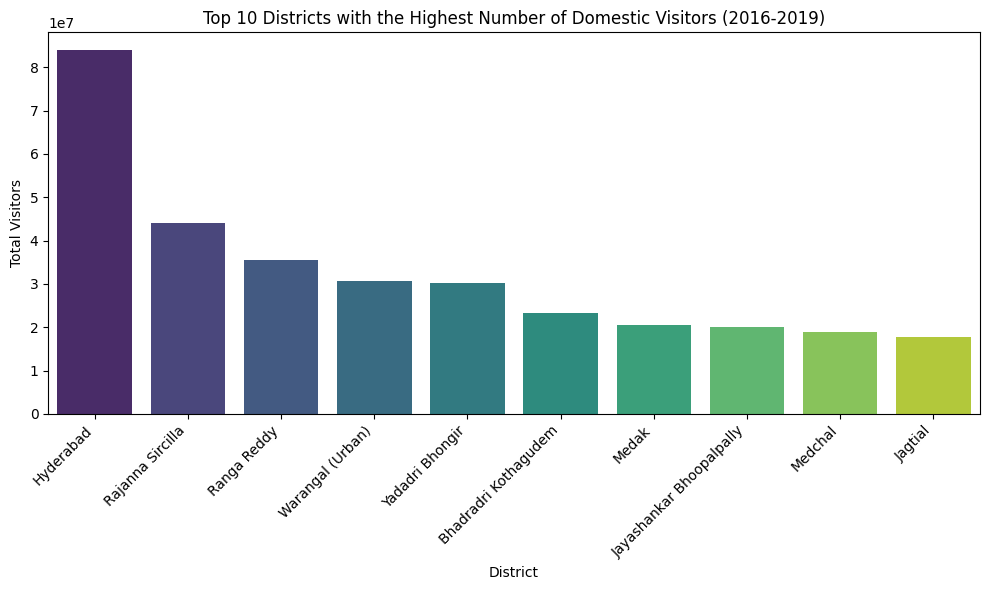

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Create a bar chart to visualize the data
plt.figure(figsize=(10, 6))

# Use 'x' as the hue parameter to avoid the warning
sns.barplot(x=top_districts.index, y=top_districts.values, palette='viridis', hue=top_districts.index)

# Set chart title and labels
plt.title('Top 10 Districts with the Highest Number of Domestic Visitors (2016-2019)')
plt.xlabel('District')
plt.ylabel('Total Visitors')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

List down the top 3 districts based on compounded annual growth rate (CAGR) of visitors between (2016-2019)?
CAGR=( 
Initial Value
Final Value
​
 ) 
number of years
1
​
 
 −1

In [23]:
# Filter data for 2016 and 2019 only
data_filtered = data[data['year'].isin([2016, 2019])]

# Pivot the data to have district as index and years as columns
pivot_data = data_filtered.pivot_table(index='district', columns='year', values='visitors', aggfunc='sum')
print (pivot_data)

# Calculate CAGR for each district
pivot_data['CAGR'] = ((pivot_data[2019] / pivot_data[2016]) ** (1 / 3)) - 1
print(pivot_data['CAGR'])


year                            2016        2019
district                                        
Adilabad                   5075567.0    775901.0
Bhadradri Kothagudem       2523687.0  12817737.0
Hyderabad                 23558336.0  14121662.0
Jagtial                    7122742.0   3086115.0
Jangaon                    1039946.0    328890.0
Jayashankar Bhoopalpally    644270.0    662575.0
Jogulamba Gadwal           1596287.0   2008290.0
Kamareddy                   820878.0       534.0
Karimnagar                 9167468.0     77491.0
Khammam                    5005031.0   1413440.0
Komaram Bheem Asifabad      523809.0     19189.0
Mahabubabad                 198642.0    152885.0
Mahbubnagar                8305634.0   2535255.0
Mancherial                  967878.0    269820.0
Medak                      3463200.0   5452570.0
Medchal                    5134558.0   2104254.0
Mulugu                           NaN   1820375.0
Nagarkurnool               3056533.0   2093511.0
Nalgonda            

In [24]:
# Sort the districts based on CAGR in descending order
top_districts_cagr = pivot_data['CAGR'].sort_values(ascending=False).head(3)

# Display the results
print(top_districts_cagr)

district
Vikarabad    1.311507
Nizamabad    0.930307
Suryapet     0.774168
Name: CAGR, dtype: float64


C:\Users\anshi\AppData\Local\Temp\ipykernel_25144\165621423.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


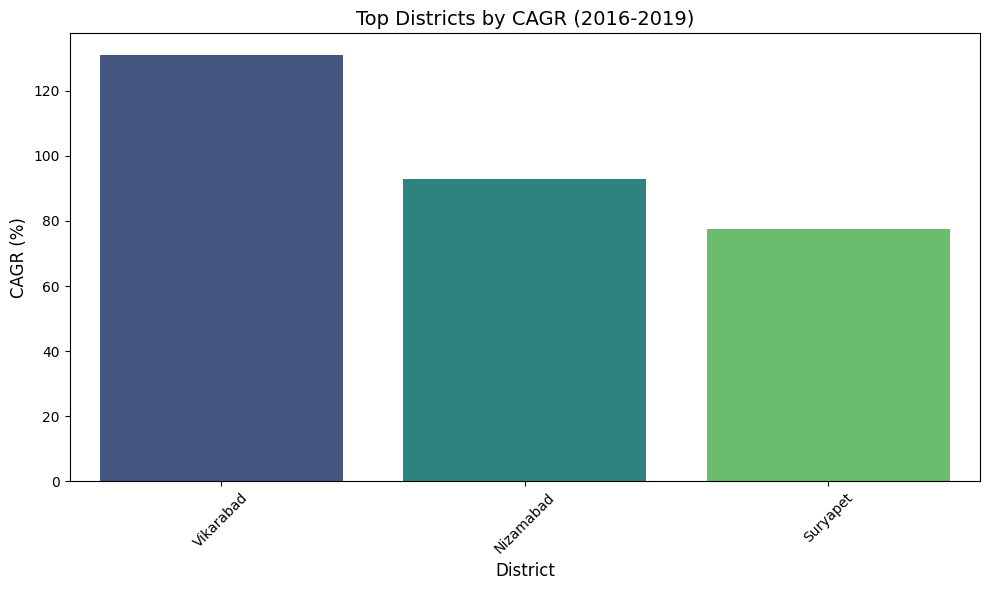

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Top Districts by CAGR
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_districts_cagr.index,
    y=top_districts_cagr.values * 100,  # Convert CAGR to percentage
    palette='viridis'
)
plt.title("Top Districts by CAGR (2016-2019)", fontsize=14)
plt.xlabel("District", fontsize=12)
plt.ylabel("CAGR (%)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


List down the bottom 3 districts based on compounded annual growth rate (CAGR) of visitors between (2016-2019)?

In [26]:
# Sort the districts based on CAGR in ascending manner
bottom_districts_cagr = pivot_data['CAGR'].sort_values(ascending=True).head(3)

# Display the results
print(bottom_districts_cagr)

district
Kamareddy    -0.913353
Karimnagar   -0.796296
Nalgonda     -0.711335
Name: CAGR, dtype: float64


C:\Users\anshi\AppData\Local\Temp\ipykernel_25144\4209386820.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


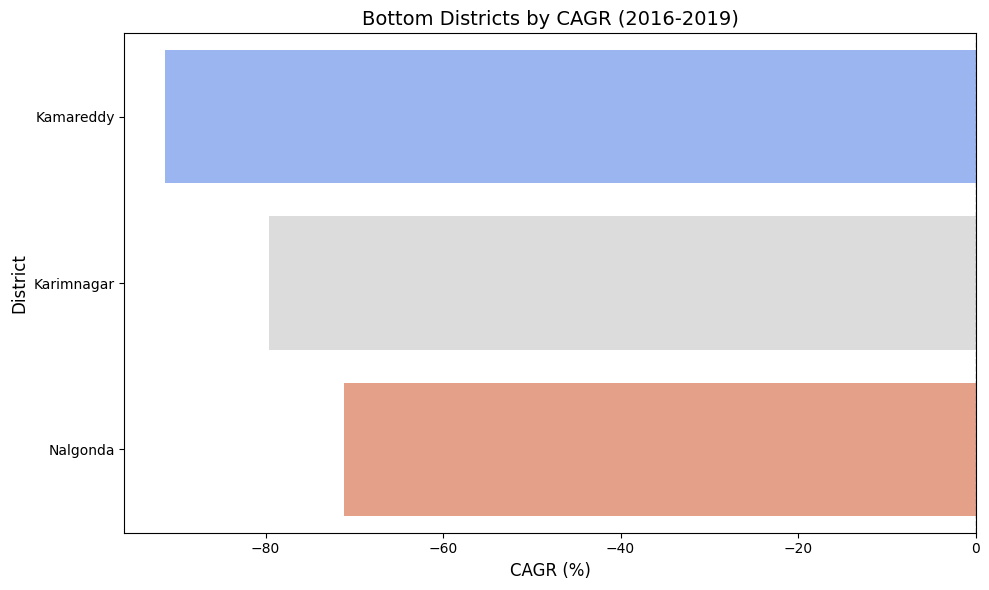

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Bottom Districts by CAGR
plt.figure(figsize=(10, 6))
sns.barplot(
    x=bottom_districts_cagr.values * 100,  # Convert CAGR to percentage
    y=bottom_districts_cagr.index,
    palette='coolwarm'
)
plt.title("Bottom Districts by CAGR (2016-2019)", fontsize=14)
plt.xlabel("CAGR (%)", fontsize=12)
plt.ylabel("District", fontsize=12)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)  # Add a vertical line at 0% CAGR
plt.tight_layout()
plt.show()


What are the peak and low season months for Hyderabad based on the data from 2016 to 2019 for Hyderabad district?

Peak Month: June with 16965307 visitors
Low Month: February with 5118208 visitors


C:\Users\anshi\AppData\Local\Temp\ipykernel_25144\2890538907.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


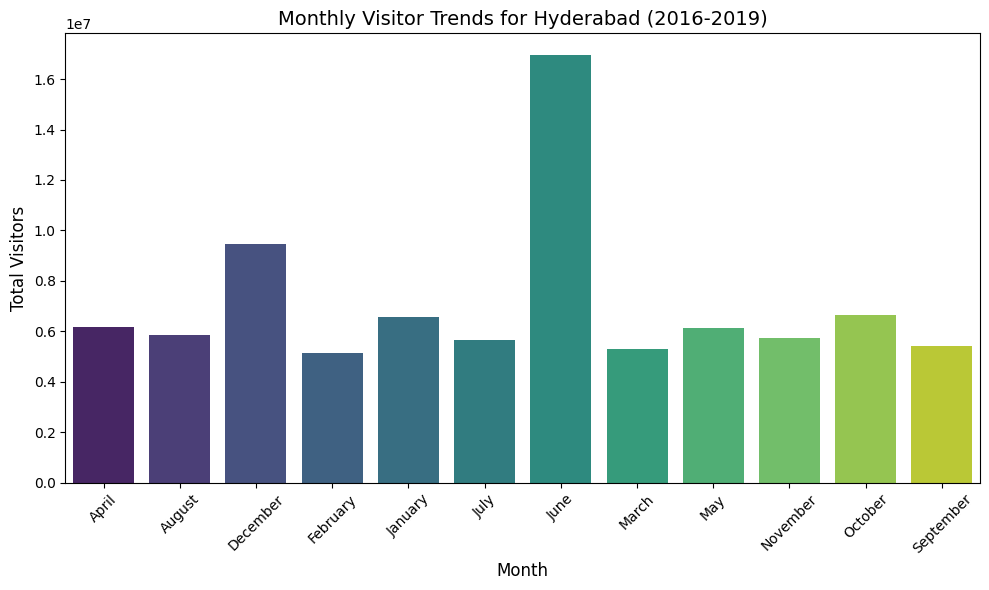

In [28]:
# Filter data for Hyderabad district
hyderabad_data = data[data['district'] == 'Hyderabad']

# Group by month and sum visitors across all years
monthly_visitors = hyderabad_data.groupby('month')['visitors'].sum()

# Sort to identify peak and low seasons
peak_month = monthly_visitors.idxmax()
low_month = monthly_visitors.idxmin()

# Display the results
print(f"Peak Month: {peak_month} with {monthly_visitors.max()} visitors")
print(f"Low Month: {low_month} with {monthly_visitors.min()} visitors")

# Plot the monthly visitor data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x=monthly_visitors.index,
    y=monthly_visitors.values,
    palette='viridis'
)
plt.title("Monthly Visitor Trends for Hyderabad (2016-2019)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Visitors", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Show the top & bottom 3 districts with high domestic to foreign tourist ratio?

In [29]:
import pandas as pd

# Load the domestic and foreign datasets
domestic_data = pd.read_csv(r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Resume_Project_challenge_5\datasets\domestic_visitors_cleaned.csv")
foreign_data = pd.read_csv(r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Resume_Project_challenge_5\datasets\foreign_visitors_cleaned.csv")

# Add a 'type' column to indicate whether the data is domestic or foreign
domestic_data['type'] = 'domestic'
foreign_data['type'] = 'foreign'

# Combine both datasets
data = pd.concat([domestic_data, foreign_data], ignore_index=True)

# Pivot the data to separate domestic and foreign visitors by district
pivot_data = data.pivot_table(index='district', columns='type', values='visitors', aggfunc='sum')

# Remove rows where either domestic or foreign visitors are missing
pivot_data = pivot_data.dropna()

# Calculate the ratio of domestic to foreign visitors
pivot_data['domestic_to_foreign_ratio'] = pivot_data['domestic'] / pivot_data['foreign']

# Handle infinite ratios (where foreign visitors are zero)
pivot_data['domestic_to_foreign_ratio'] = pivot_data['domestic_to_foreign_ratio'].replace([float('inf'), -float('inf')], float('nan'))

# Sort the districts based on the ratio
top_3_districts = pivot_data['domestic_to_foreign_ratio'].sort_values(ascending=False).head(3)
bottom_3_districts = pivot_data['domestic_to_foreign_ratio'].sort_values(ascending=True).head(3)

# Display the results
print("Top 3 Districts with the Highest Domestic to Foreign Tourist Ratio:")
print(top_3_districts)

print("\nBottom 3 Districts with the Lowest Domestic to Foreign Tourist Ratio:")
print(bottom_3_districts)


Top 3 Districts with the Highest Domestic to Foreign Tourist Ratio:
district
Nirmal      7.759790e+06
Jangaon     9.127840e+05
Adilabad    2.287992e+05
Name: domestic_to_foreign_ratio, dtype: float64

Bottom 3 Districts with the Lowest Domestic to Foreign Tourist Ratio:
district
Hyderabad             80.295837
Jagtial              223.532520
Warangal (Rural)    3099.882353
Name: domestic_to_foreign_ratio, dtype: float64


C:\Users\anshi\AppData\Local\Temp\ipykernel_25144\3350380244.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


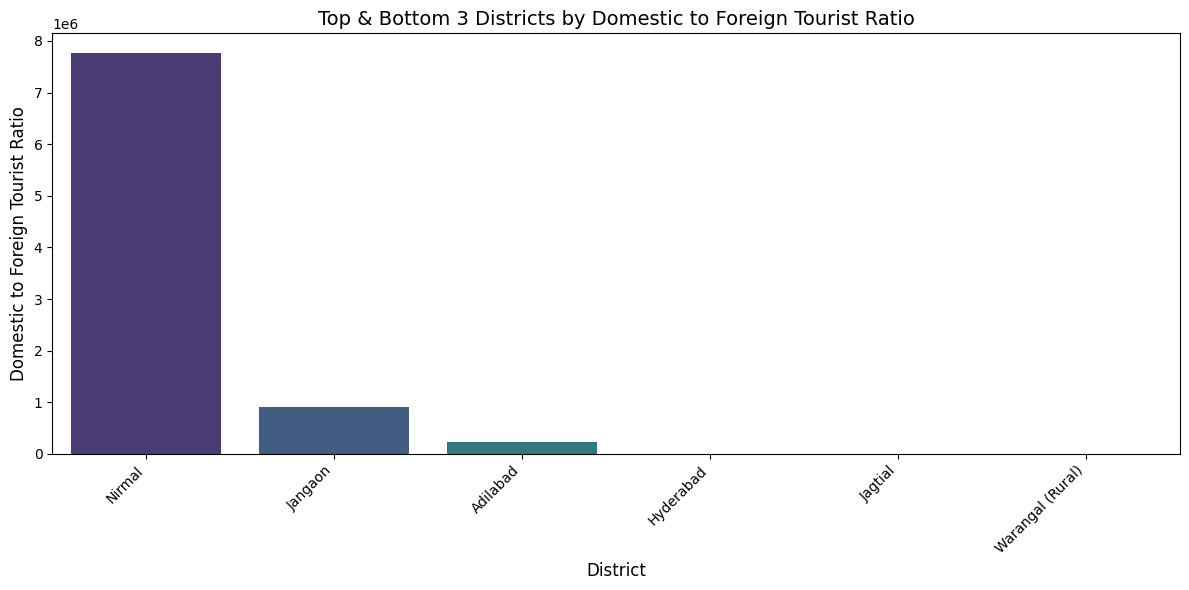

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the top and bottom districts for visualization
combined_data = pd.concat([top_3_districts, bottom_3_districts])

# Plot the Domestic to Foreign Tourist Ratio
plt.figure(figsize=(12, 6))
sns.barplot(
    x=combined_data.index,
    y=combined_data.values,
    palette='viridis'
)

# Set the title and labels
plt.title("Top & Bottom 3 Districts by Domestic to Foreign Tourist Ratio", fontsize=14)
plt.xlabel("District", fontsize=12)
plt.ylabel("Domestic to Foreign Tourist Ratio", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()


List the top & bottom 5 districts based on "population to tourist footfall ratio" in 2019? (ratio: Total Visitors/Total Residents Population in the given year)

In [31]:
import pandas as pd

# Load the dataset, skipping the first row
population_data = pd.read_csv(r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Resume_Project_challenge_5\datasets\telangana 2011 population census.xlsx.csv",skiprows=1
)

# Display the first few rows of the data
print(population_data.head())


               district population
0              Adilabad   6,34,000
1  Bhadradri Kothagudem  10,69,261
2             Hyderabad  39,43,323
3               Jagtial   5,66,376
4               Jangaon   5,66,376


In [32]:

# Rename the columns
population_data.columns = ['district', 'population']

# Remove commas and convert the Population column to numeric
population_data['population'] = population_data['population'].str.replace(',', '').astype(int)

# Display the cleaned dataset
print(population_data.head())


               district  population
0              Adilabad      634000
1  Bhadradri Kothagudem     1069261
2             Hyderabad     3943323
3               Jagtial      566376
4               Jangaon      566376


In [33]:

# Filter visitor data for 2019
data_2019 = data[data['year'] == 2019]

# Group visitor data by district
visitors_2019 = data_2019.groupby('district')['visitors'].sum().reset_index()

# Merge population data with visitor data
merged_data = pd.merge(visitors_2019, population_data, on='district', how='inner')

# Calculate the population to tourist footfall ratio
merged_data['population_to_tourist_ratio'] = merged_data['visitors'] / merged_data['population']

# Sort and get top and bottom 5 districts
top_5_districts = merged_data.sort_values(by='population_to_tourist_ratio', ascending=False).head(5)
bottom_5_districts = merged_data.sort_values(by='population_to_tourist_ratio', ascending=True).head(5)

# Display results
print("Top 5 Districts with Highest Population to Tourist Footfall Ratio:")
print(top_5_districts[['district', 'population_to_tourist_ratio']])

print("\nBottom 5 Districts with Lowest Population to Tourist Footfall Ratio:")
print(bottom_5_districts[['district', 'population_to_tourist_ratio']])


Top 5 Districts with Highest Population to Tourist Footfall Ratio:
                district  population_to_tourist_ratio
23      Rajanna Sircilla                    30.492335
1   Bhadradri Kothagudem                    11.987473
14                 Medak                     7.104992
16                Mulugu                     7.062725
20                Nirmal                     6.361297

Bottom 5 Districts with Lowest Population to Tourist Footfall Ratio:
      district  population_to_tourist_ratio
7    Kamareddy                     0.000549
21   Nizamabad                     0.030889
22  Peddapalli                     0.033162
8   Karimnagar                     0.077051
18    Nalgonda                     0.087072


C:\Users\anshi\AppData\Local\Temp\ipykernel_25144\790131965.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


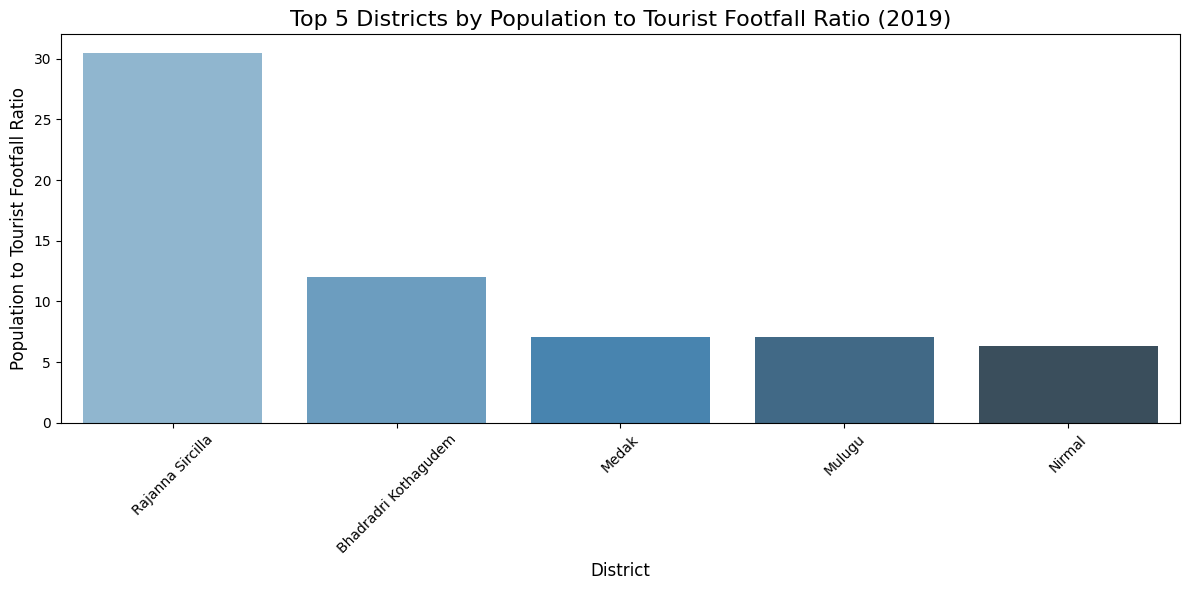

C:\Users\anshi\AppData\Local\Temp\ipykernel_25144\790131965.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


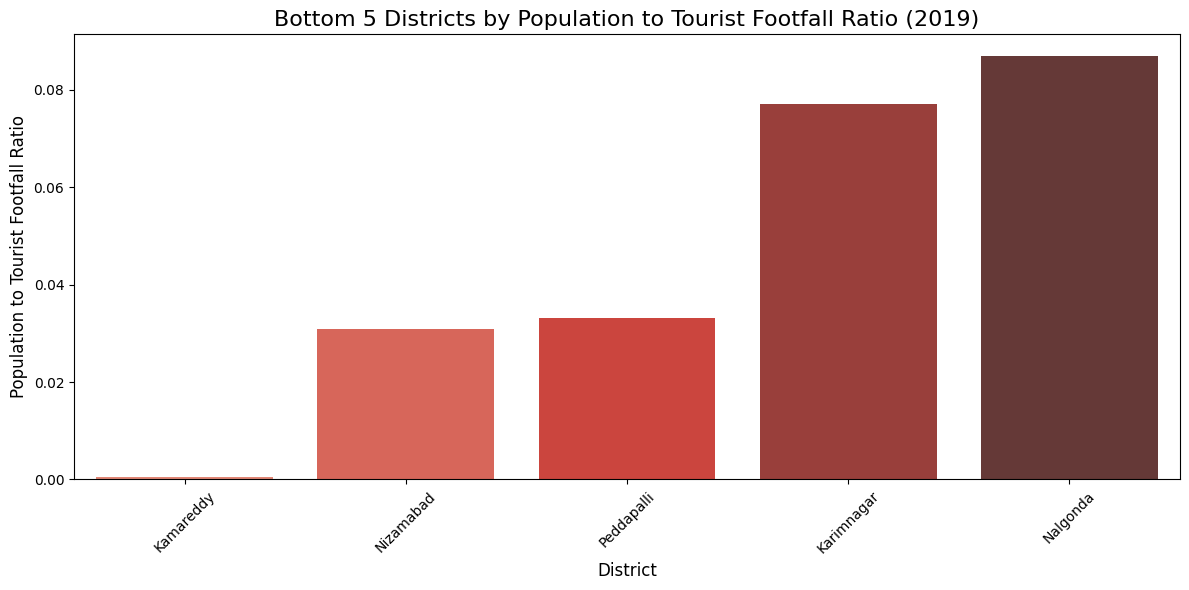

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Top 5 Districts
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_5_districts['district'], 
    y=top_5_districts['population_to_tourist_ratio'], 
    palette='Blues_d'
)
plt.title("Top 5 Districts by Population to Tourist Footfall Ratio (2019)", fontsize=16)
plt.xlabel("District", fontsize=12)
plt.ylabel("Population to Tourist Footfall Ratio", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Bottom 5 Districts
plt.figure(figsize=(12, 6))
sns.barplot(
    x=bottom_5_districts['district'], 
    y=bottom_5_districts['population_to_tourist_ratio'], 
    palette='Reds_d'
)
plt.title("Bottom 5 Districts by Population to Tourist Footfall Ratio (2019)", fontsize=16)
plt.xlabel("District", fontsize=12)
plt.ylabel("Population to Tourist Footfall Ratio", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


What will be the projected number of domestic and foreign tourists in Hyderabad in 2025 based on the growth rate from previous years?

Insight: Better estimate1 of incoming tourists count so that government can plan the infrastructure better.2   


In [35]:
import pandas as pd

# Assuming domestic_data and foreign_data are already loaded as dataframes

# Add a 'type' column to indicate whether the data is domestic or foreign
domestic_data['type'] = 'domestic'
foreign_data['type'] = 'foreign'

# Concatenate the domestic and foreign data
data = pd.concat([domestic_data, foreign_data], ignore_index=True)

# Filter data for Hyderabad
hyderabad_data = data[data['district'] == 'Hyderabad']

# Define function to calculate CAGR
def calculate_cagr(start_value, end_value, years=3):
    return round(((end_value / start_value) ** (1 / years) - 1) * 100, 2)

# Function to project visitors for 2025 based on CAGR
def project_visitors(cagr, visitors_2019, years=6):
    cagr_value = float(cagr.replace(' %', ''))  # Remove '%' and convert to float
    projected_visitors = round(visitors_2019 + (visitors_2019 * (cagr_value * years) / 100), 0)
    return projected_visitors

# 1. Calculate CAGR for Domestic and Foreign visitors (2016 to 2019)
cagr_data = []

# Loop through domestic and foreign data
for visitor_type in ['domestic', 'foreign']:
    subset = hyderabad_data[hyderabad_data['type'] == visitor_type]
    
    # Sum the visitors for 2016 and 2019
    x = subset[subset['year'] == 2016]['visitors'].sum()  # 2016 visitors
    y = subset[subset['year'] == 2019]['visitors'].sum()  # 2019 visitors
    
    # Calculate CAGR
    cagr = calculate_cagr(x, y)
    
    # Append the data
    cagr_data.append({
        'district': 'Hyderabad',
        'visitor_type': visitor_type,
        'in_2016_visitors': x,
        'by_2019_visitors': y,
        'CAGR': f"{cagr} %",
    })

# Convert the CAGR data into a DataFrame
cagr_df = pd.DataFrame(cagr_data)

# 2. Project the visitors for 2025
cagr_df['by_2025_visitors'] = cagr_df.apply(
    lambda row: project_visitors(row['CAGR'], row['by_2019_visitors']), axis=1)

# 3. Display the final data for 2025 projection
print(cagr_df[['district', 'in_2016_visitors', 'by_2019_visitors', 'CAGR', 'visitor_type', 'by_2025_visitors']])

# Optionally, save the result to a new CSV file
cagr_df.to_csv("hyderabad_projected_visitors_2025.csv", index=False)


    district  in_2016_visitors  by_2019_visitors      CAGR visitor_type  \
0  Hyderabad        23394705.0        13802362.0  -16.13 %     domestic   
1  Hyderabad          163631.0          319300.0   24.96 %      foreign   

   by_2025_visitors  
0          444436.0  
1          797484.0  


Estimate the projected revenue for Hyderabad in 2025 based on average spend per tourist (approximate data).

Insight: Estimate projected revenue for Hyderabad in 2025 based on average spend per tourist (approximate data).

In [36]:
# Average spend per tourist (in Rs)
avg_spend_domestic = 1200
avg_spend_foreign = 5600

# Projected visitors for 2025 (from previous results)
projected_domestic_2025 = 444436
projected_foreign_2025 = 797484

# Projected revenue for 2025
revenue_domestic_2025 = projected_domestic_2025 * avg_spend_domestic
revenue_foreign_2025 = projected_foreign_2025 * avg_spend_foreign

# Total projected revenue
total_revenue_2025 = revenue_domestic_2025 + revenue_foreign_2025

# Print the results
print(f"Projected Revenue from Domestic Tourists in 2025: Rs {revenue_domestic_2025:,.2f}")
print(f"Projected Revenue from Foreign Tourists in 2025: Rs {revenue_foreign_2025:,.2f}")
print(f"Total Projected Revenue for Hyderabad in 2025: Rs {total_revenue_2025:,.2f}")


Projected Revenue from Domestic Tourists in 2025: Rs 533,323,200.00
Projected Revenue from Foreign Tourists in 2025: Rs 4,465,910,400.00
Total Projected Revenue for Hyderabad in 2025: Rs 4,999,233,600.00


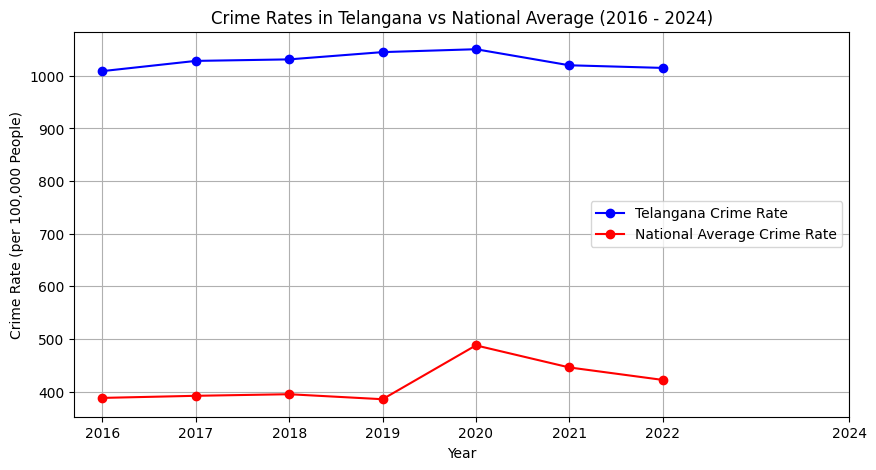

In [37]:
import matplotlib.pyplot as plt

# Years for the x-axis
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2024]

# Crime rates for Telangana and National Average for each year
telangana_crime_rates = [1008.9, 1028.3, 1031.2, 1045.0, 1050.5, 
                          1020.0, 1015.0, None] # Last year estimated
national_crime_rates = [388.0, 392.0, 395.0, 385.5,
                        487.8, 445.9, 422.2, None] # Last year estimated

# Plotting the data
plt.figure(figsize=(10,5))
plt.plot(years[:-1], telangana_crime_rates[:-1], marker='o', label='Telangana Crime Rate', color='blue')
plt.plot(years[:-1], national_crime_rates[:-1], marker='o', label='National Average Crime Rate', color='red')

# Adding titles and labels
plt.title('Crime Rates in Telangana vs National Average (2016 - 2024)')
plt.xlabel('Year')
plt.ylabel('Crime Rate (per 100,000 People)')
plt.xticks(years)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


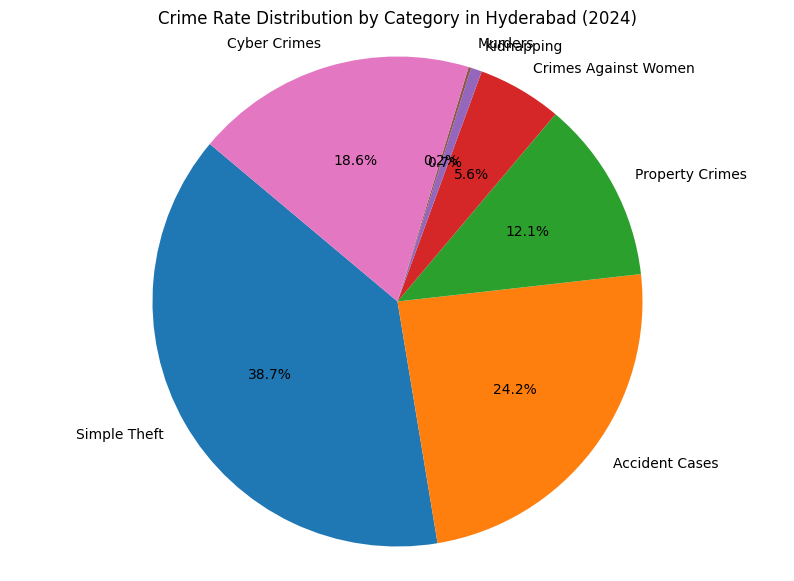

In [38]:
import matplotlib.pyplot as plt

# Crime categories and their corresponding values
categories = ['Simple Theft', 'Accident Cases', 'Property Crimes', 
              'Crimes Against Women', 'Kidnapping', 'Murders', 'Cyber Crimes']
values = [17275, 10783, 5381, 2482, 324, 77, 8287]

# Creating the pie chart
plt.figure(figsize=(10, 7))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Crime Rate Distribution by Category in Hyderabad (2024)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


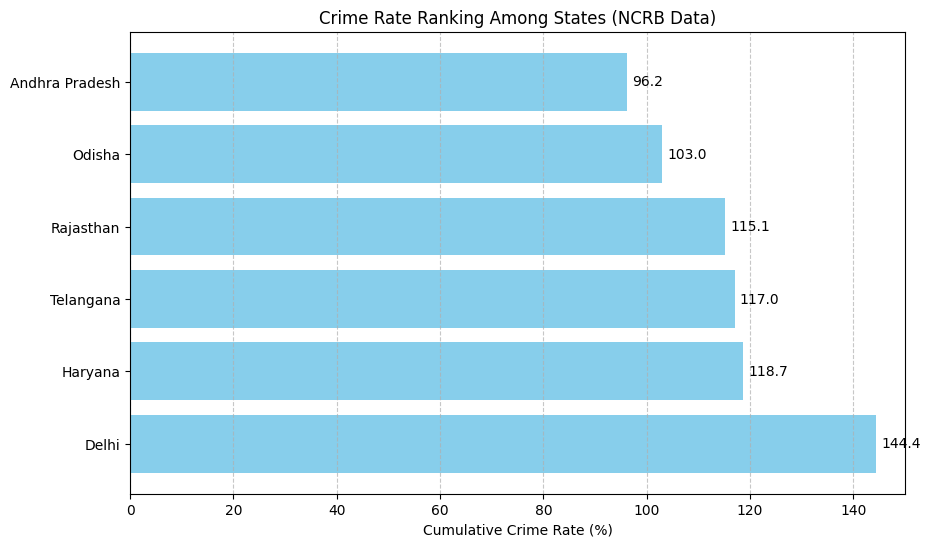

In [39]:
import matplotlib.pyplot as plt

# Data for the crime rates
states = ['Delhi', 'Haryana', 'Telangana', 'Rajasthan', 'Odisha', 'Andhra Pradesh']
crime_rates = [144.4, 118.7, 117.0, 115.1, 103.0, 96.2]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(states, crime_rates, color='skyblue')

# Adding titles and labels
plt.xlabel('Cumulative Crime Rate (%)')
plt.title('Crime Rate Ranking Among States (NCRB Data)')
plt.xlim(0, 150)  # Set x-axis limit for better visualization

# Displaying the value on the bars
for index, value in enumerate(crime_rates):
    plt.text(value + 1, index, str(value), va='center')

# Show the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


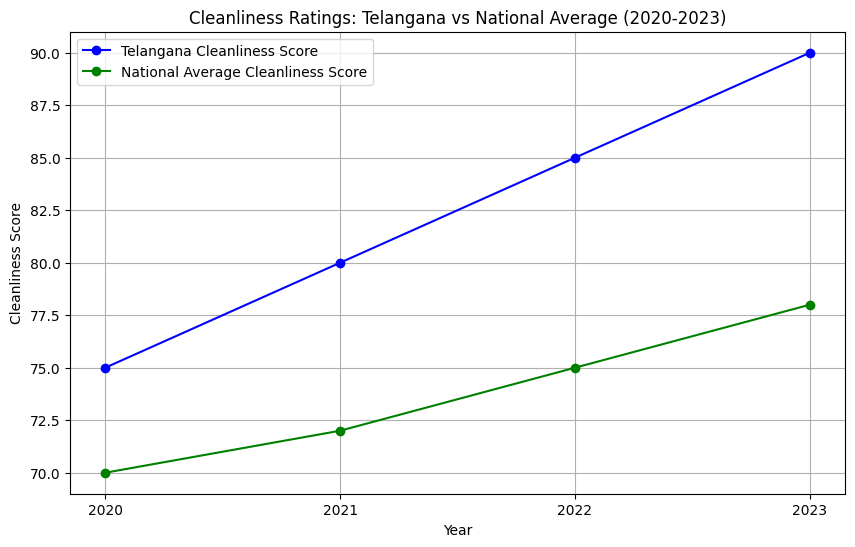

In [40]:
import matplotlib.pyplot as plt

# Years
years = [2020, 2021, 2022, 2023]

# Cleanliness scores
telangana_scores = [75, 80, 85, 90]
national_average_scores = [70, 72, 75, 78]

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(years, telangana_scores, marker='o', label='Telangana Cleanliness Score', color='blue')
plt.plot(years, national_average_scores, marker='o', label='National Average Cleanliness Score', color='green')

# Adding titles and labels
plt.title('Cleanliness Ratings: Telangana vs National Average (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Cleanliness Score')
plt.xticks(years)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


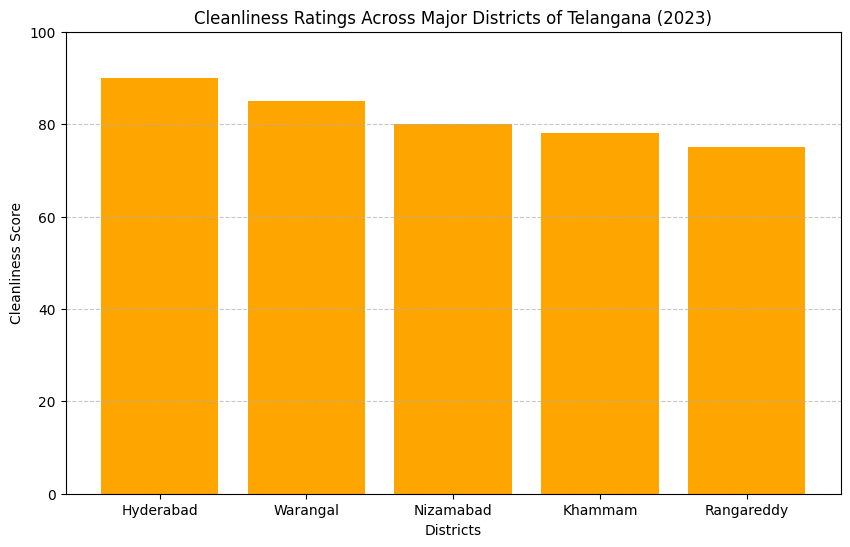

In [41]:
# Data for districts and their cleanliness scores
districts = ['Hyderabad', 'Warangal', 'Nizamabad', 'Khammam', 'Rangareddy']
district_scores = [90, 85, 80, 78, 75]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(districts, district_scores, color='orange')

# Adding titles and labels
plt.title('Cleanliness Ratings Across Major Districts of Telangana (2023)')
plt.xlabel('Districts')
plt.ylabel('Cleanliness Score')
plt.ylim(0, 100) # Set y-axis limit for better visualization

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


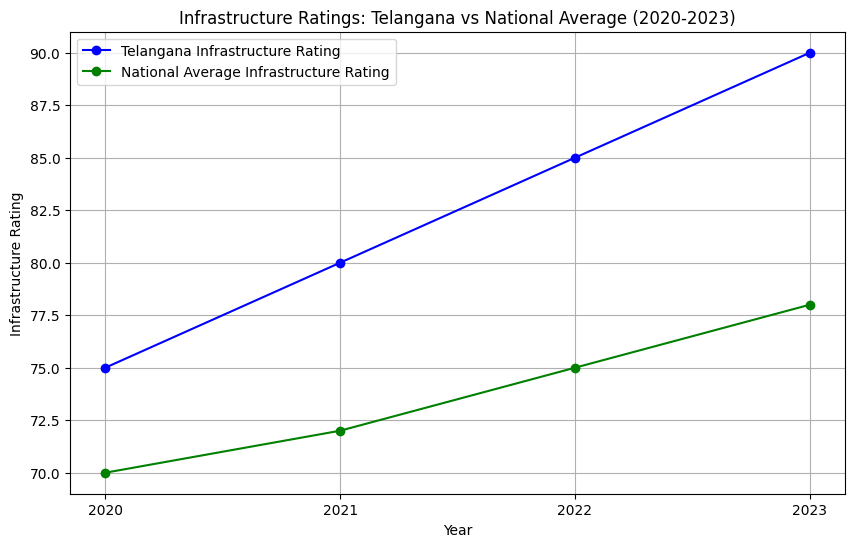

In [42]:
import matplotlib.pyplot as plt

# Years
years = [2020, 2021, 2022, 2023]

# Infrastructure ratings
telangana_ratings = [75, 80, 85, 90]
national_average_ratings = [70, 72, 75, 78]

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(years, telangana_ratings, marker='o', label='Telangana Infrastructure Rating', color='blue')
plt.plot(years, national_average_ratings, marker='o', label='National Average Infrastructure Rating', color='green')

# Adding titles and labels
plt.title('Infrastructure Ratings: Telangana vs National Average (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Infrastructure Rating')
plt.xticks(years)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


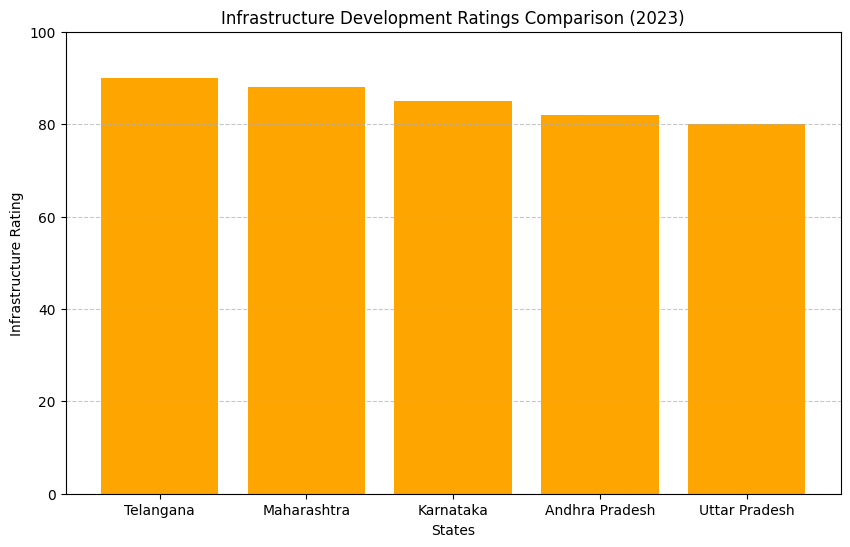

In [43]:
# Data for states and their infrastructure ratings
states = ['Telangana', 'Maharashtra', 'Karnataka', 'Andhra Pradesh', 'Uttar Pradesh']
ratings = [90, 88, 85, 82, 80]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(states, ratings, color='orange')

# Adding titles and labels
plt.title('Infrastructure Development Ratings Comparison (2023)')
plt.xlabel('States')
plt.ylabel('Infrastructure Rating')
plt.ylim(0, 100) # Set y-axis limit for better visualization

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [44]:
import folium

# Create a map centered around Telangana
telangana_map = folium.Map(location=[17.385044, 78.486671], zoom_start=7)

# Active projects
active_projects = {
    "Mission Kakatiya": [17.385044, 78.486671],
    "Mission Bhagiratha": [17.500000, 78.600000],
    "Mana Ooru Mana Badi": [17.300000, 78.400000],
    "Industrial Park": [17.700000, 78.800000]
}

# Upcoming infrastructure projects
upcoming_projects = {
    "Warangal to Khammam Highway": [17.500000, 79.600000],
    "Khammam to Vijayawada Highway": [16.500000, 80.600000],
    "Suryapet to Khammam Highway": [17.300000, 80.400000],
    "Samakka Sarakka Central Tribal University": [17.500000, 80.300000]
}

# Add markers for active projects
for project_name, coordinates in active_projects.items():
    folium.Marker(location=coordinates,
                  popup=f"Active Project: {project_name}",
                  icon=folium.Icon(color='blue')).add_to(telangana_map)

# Add markers for upcoming projects
for project_name, coordinates in upcoming_projects.items():
    folium.Marker(location=coordinates,
                  popup=f"Upcoming Project: {project_name}",
                  icon=folium.Icon(color='green')).add_to(telangana_map)

# Save the map to an HTML file
telangana_map.save("telangana_infrastructure_projects.html")
